<a href="https://colab.research.google.com/github/agadeno/Colab/blob/main/DS_C3_SC1_AGUSTINADELANTADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: AGUSTIN ADELANTADO NOGUE

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [2]:
happiness= pd.read_csv('/content/happiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [3]:
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

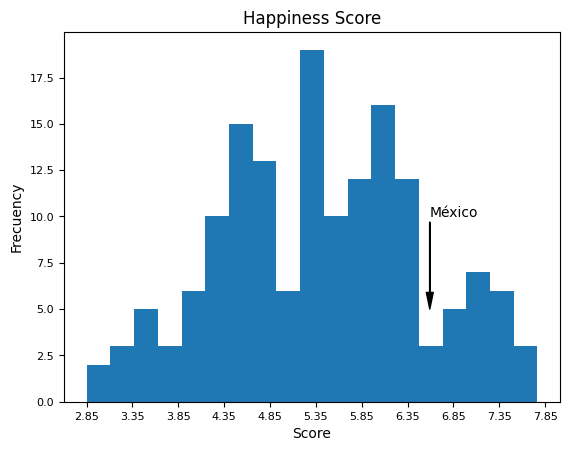

In [4]:
from seaborn._core.properties import FontSize
from matplotlib.ticker import StrMethodFormatter
num_bars = int((happiness['Score'].max()-happiness['Score'].min())/0.25)
plt.hist(happiness['Score'],bins = num_bars)
plt.title('Happiness Score')
plt.xlabel('Score')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
plt.xticks(np.arange(happiness['Score'].min(),
                     happiness['Score'].max()+0.5,0.5),
                     fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Frecuency')
plt.annotate('México', xy = (float(mexico['Score'].values[0]), 5), xytext = (float(mexico['Score'].values[0]), 10),
             arrowprops= dict(facecolor = 'black', width = 0.3, headwidth = 5))
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

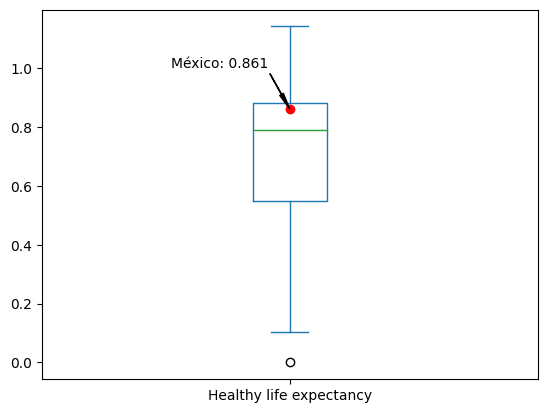

In [5]:
happiness['Healthy life expectancy'].plot(kind='box')
plt.plot(1,mexico['Healthy life expectancy'].values[0], marker="o", color="red")
datos=str('México: ')+str(mexico['Healthy life expectancy'].values[0])
plt.annotate(datos, xy = (1, mexico['Healthy life expectancy'].values[0]), xytext = (float(mexico['Healthy life expectancy'].values[0])-0.1, 1),
             arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 3))
plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

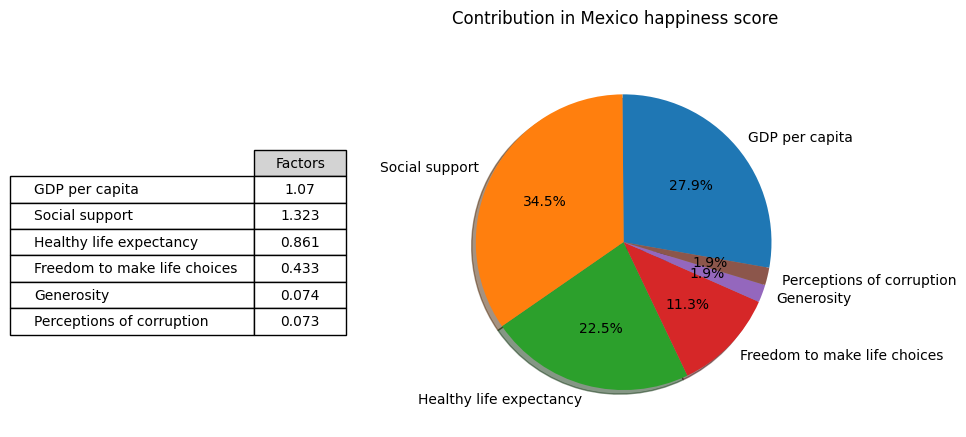

In [6]:
mexico2= mexico.drop(['Overall rank','Score'], axis=1).T
mexico2.columns=['Factors']
mexico2.plot(kind='pie',
             subplots= True,
             ylabel= '',
             legend= False,
             title= 'Contribution in Mexico happiness score',
             autopct= "%1.1f%%",
             shadow= True,
             startangle= -10)
plt.xticks([])
plt.table(cellText=mexico2.values,
          colLabels= mexico2.columns,
          loc='left',
          rowLabels=mexico2.index,
          cellLoc='center',
          edges='closed',
          colColours=['lightgrey'],
          colWidths=[0.2,0.2],
          bbox=[-0.5,0.25,0.25,0.5])
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

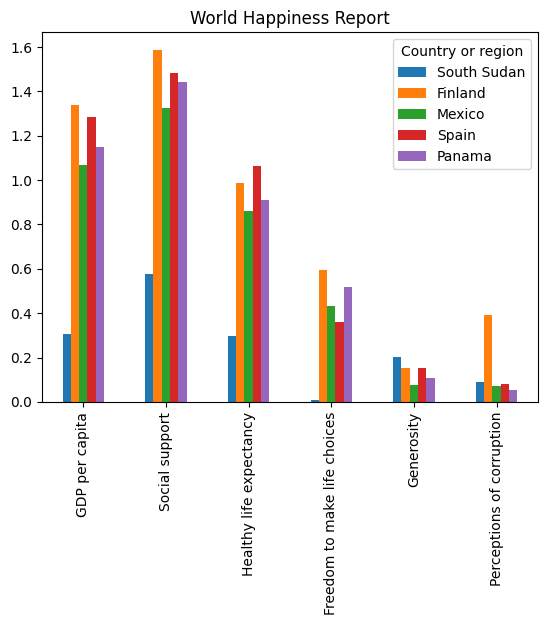

In [7]:
sel_max=happiness[happiness.Score == happiness.Score.max()]
sel_min=happiness[happiness.Score == happiness.Score.min()]
sel_mex=happiness[happiness['Country or region']=='Mexico']
sel_other=happiness[happiness['Country or region'].isin(['Panama','Spain'])]
sel_all=pd.concat([sel_min,sel_max,sel_mex,sel_other]).drop(['Score','Overall rank'], axis= 1)
sel_all= sel_all.set_index('Country or region').T
sel_all.plot(kind='bar',title='World Happiness Report')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

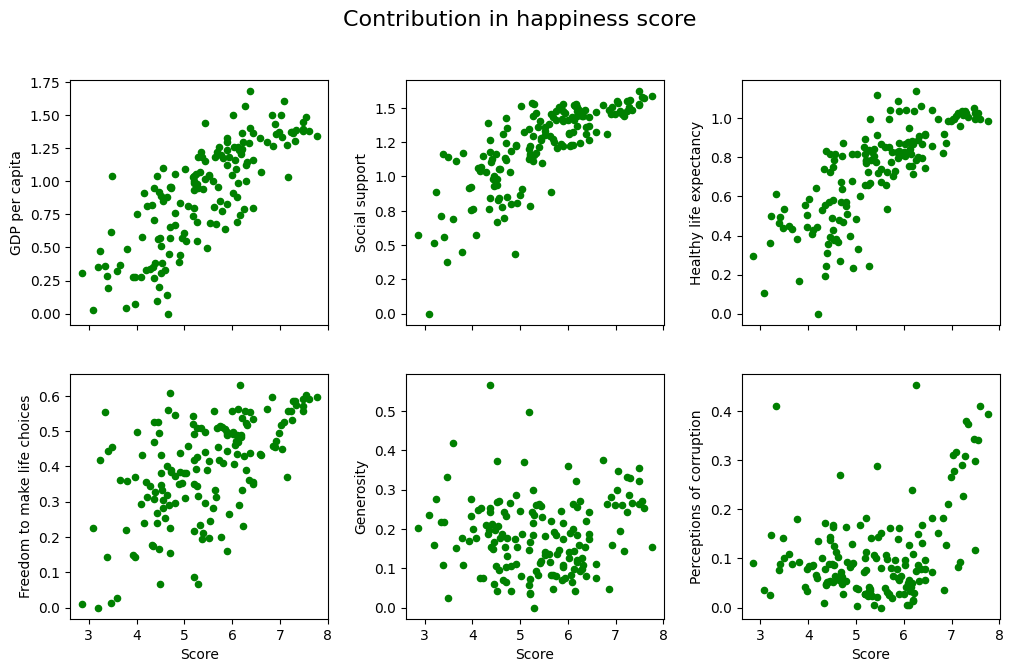

In [9]:
from matplotlib import ticker

fig,axs = plt.subplots(2, 3, figsize=(12,7),sharex=True)
fig.suptitle('Contribution in happiness score',fontsize=16)
plt.subplots_adjust(wspace=0.3,hspace=0.2)
for i in range(0,2):
  for j in range(0,3):
    axs[i][j].set_facecolor('white')
    axs[i][j].spines[['top','right','bottom','left']].set_color('black')

happiness.plot(kind= 'scatter', x= 'Score', y= 'GDP per capita', ax= axs[0,0],color='g')
happiness.plot(kind= 'scatter', x= 'Score', y= 'Social support', ax= axs[0,1],color='g')
happiness.plot(kind= 'scatter', x= 'Score', y= 'Healthy life expectancy', ax= axs[0,2],color='g')
happiness.plot(kind= 'scatter', x= 'Score', y= 'Freedom to make life choices', ax= axs[1,0],color='g')
happiness.plot(kind= 'scatter', x= 'Score', y= 'Generosity', ax= axs[1,1],color='g')
happiness.plot(kind= 'scatter', x= 'Score', y= 'Perceptions of corruption', ax= axs[1,2],color='g')

axs[0,1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))

plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

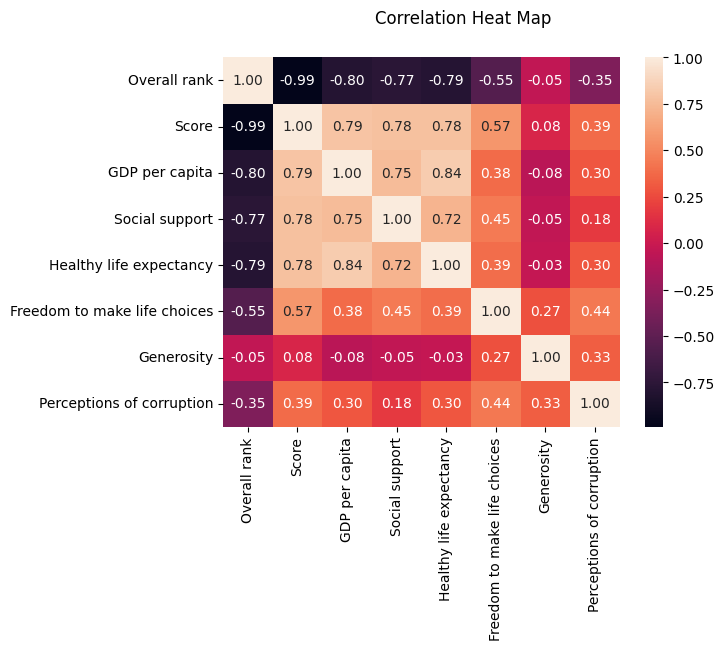

In [10]:
#Para evitar un warning de compilación, deben eliminarse las columnas no numéricas del dataframe
happiness_num= happiness.drop('Country or region', axis=1)

happiness_corr_matrix = happiness_num.corr()
sns.heatmap(happiness_corr_matrix,annot=True, fmt=".2f")

plt.suptitle('Correlation Heat Map')
plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

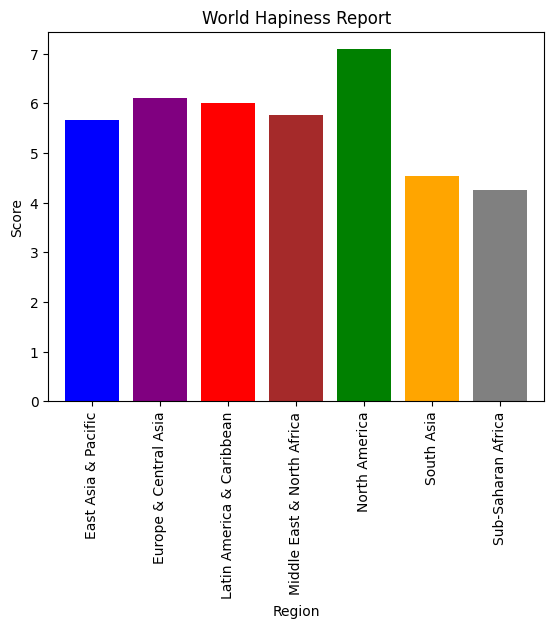

In [73]:
metada= pd.read_csv('/content/Metadata.csv')
metada.rename(columns={"TableName": "Country or region"}, errors="raise", inplace=True)
happiness_region= pd.merge(left=happiness, right=metada, on='Country or region')
happiness_region_avg= happiness_region.groupby('Region')['Score'].mean()
happiness_region_avg.plot(kind='bar', ylabel='Score', title='World Hapiness Report',
                          width=0.8,
                          color=('blue','purple','red','brown','green','orange','grey'))
plt.show()